In [1]:
import numpy as np
import h5py

fn1 = "/home/shared/sp18-is590dv/data/michigan_lld/michigan_lld.flt"
michigan = np.fromfile(fn1, dtype='f4').reshape((5365, 4201))

fn2 = "/home/shared/sp18-is590dv/data/single_dicom.h5"
with h5py.File(fn2) as f:
    scan = f["/scan"][:]

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
michigan.shape, scan.shape

((5365, 4201), (36, 512, 512))

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

(array([  285668.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 22252697.]),
 array([-9999.        , -8963.90565186, -7928.81130371, -6893.71695557,
        -5858.62260742, -4823.52825928, -3788.43391113, -2753.33956299,
        -1718.24521484,  -683.1508667 ,   351.94348145]),
 <a list of 10 Patch objects>)

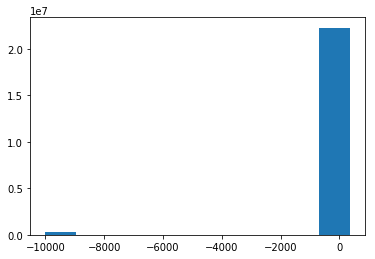

In [5]:
plt.hist(michigan.flat)

In [6]:
michigan.min()

-9999.0

In [7]:
michigan[michigan == -9999] = np.nan

In [8]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

In [9]:
michigan.min(), michigan.max()

(nan, nan)

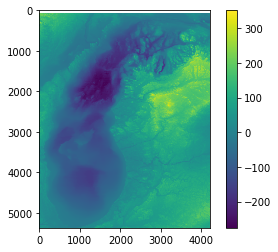

In [11]:
plt.imshow(michigan)
plt.colorbar()

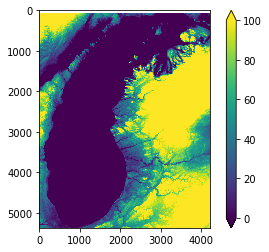

In [13]:
plt.imshow(michigan)
plt.clim(0, 100)
plt.colorbar(extend = 'both')

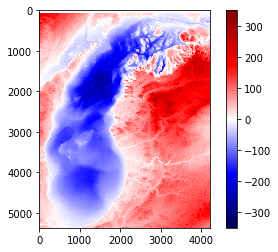

In [19]:
# (-275.89, 351.94348)
plt.imshow(michigan, cmap="seismic")
plt.clim(-352, 352)
plt.colorbar()

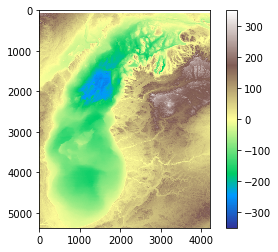

In [20]:
plt.imshow(michigan, cmap="terrain")
plt.clim(-352, 352)
plt.colorbar()

In [21]:
import matplotlib.colors as colors

In [24]:
plt.rcParams["figure.dpi"] = 200

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/matplotlib/colors.py:1114: RuntimeWarning: invalid value encountered in greater
  masked = np.abs(a) > self.linthresh


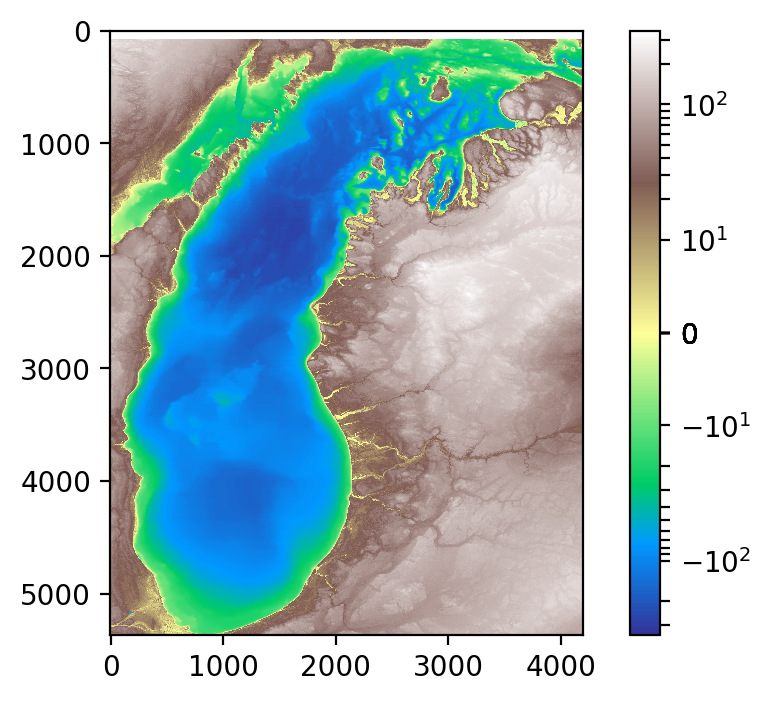

In [25]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()

(3300, 3900)

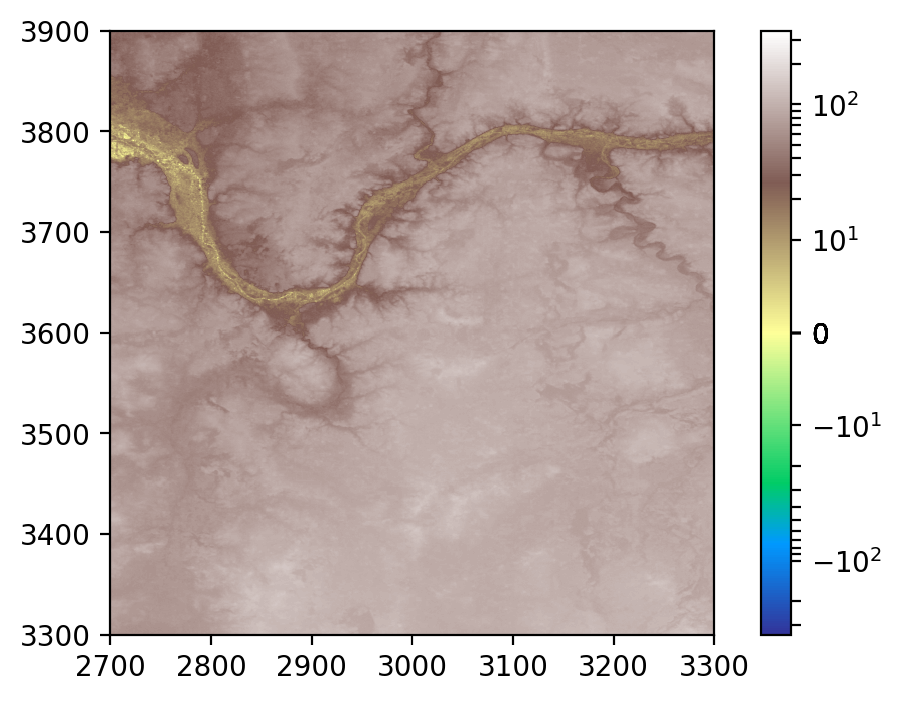

In [27]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.xlim(2700, 3300)
plt.ylim(3300, 3900)

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/matplotlib/colors.py:1114: RuntimeWarning: invalid value encountered in greater
  masked = np.abs(a) > self.linthresh


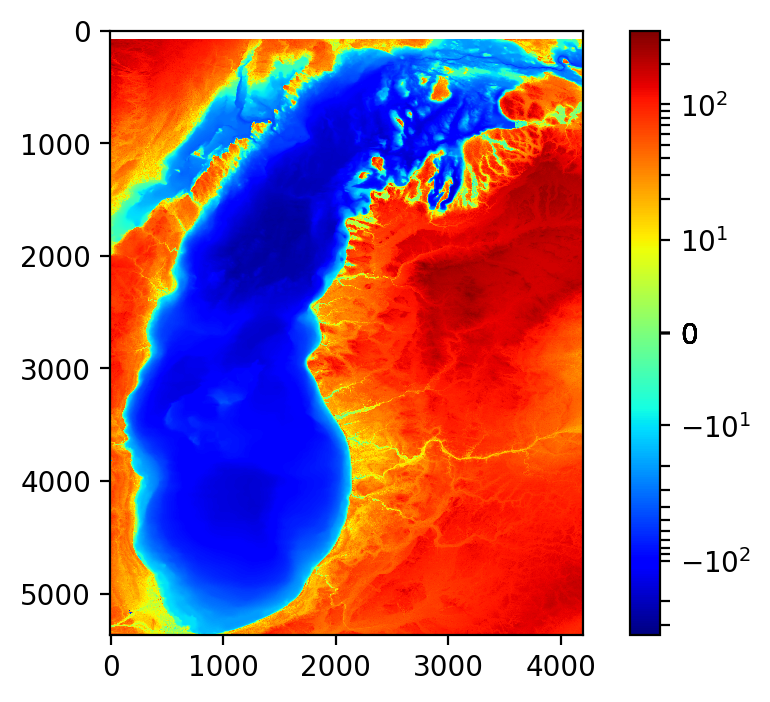

In [29]:
plt.imshow(michigan, cmap="jet", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()

In [30]:
scan.shape

(36, 512, 512)

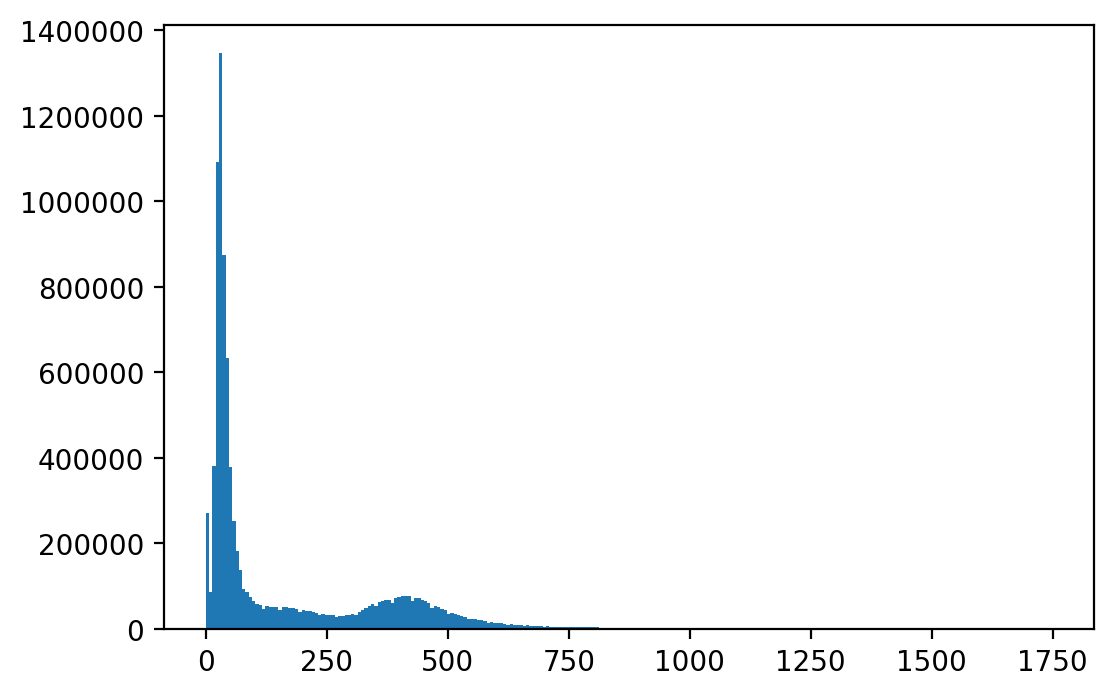

In [33]:
plt.hist(scan.flat, bins=256);

In [34]:
scan.min(), scan.max()

(0.0, 1747.0)

In [35]:
scan.mean(), scan.std()

(159.75500689612494, 191.7363424834759)

In [36]:
scan[18, :, :].shape

(512, 512)

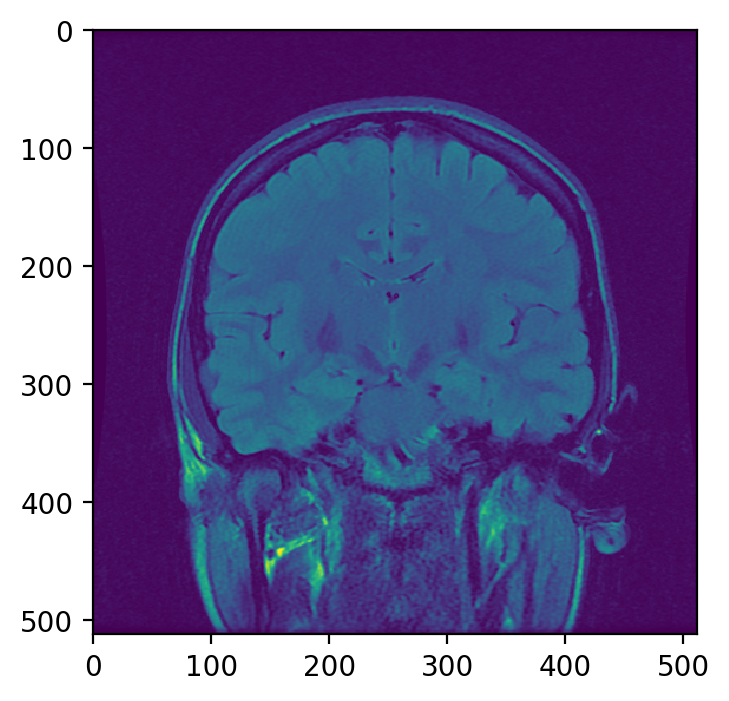

In [37]:
plt.imshow(scan[18, :, :])

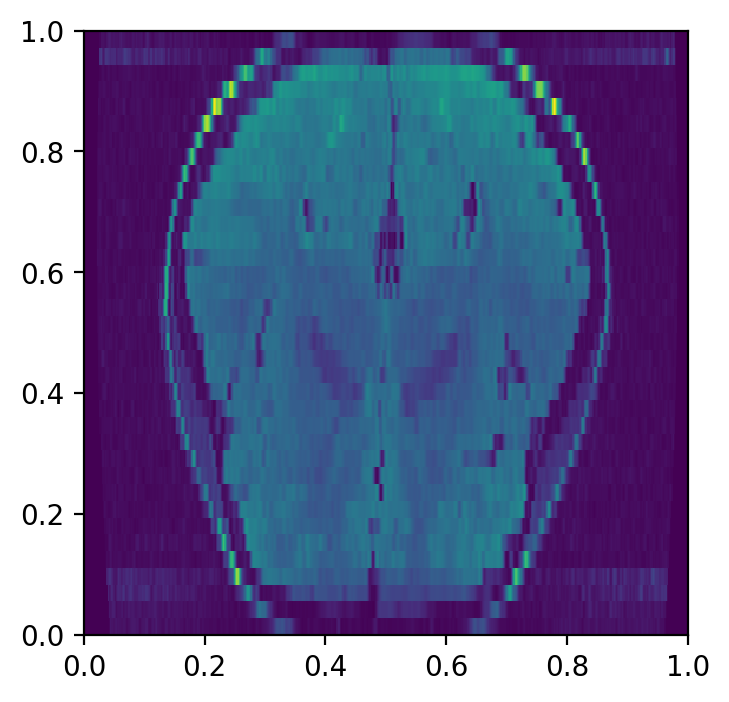

In [39]:
plt.imshow(scan[:, 256, :], extent = [0.0, 1.0, 0.0, 1.0])

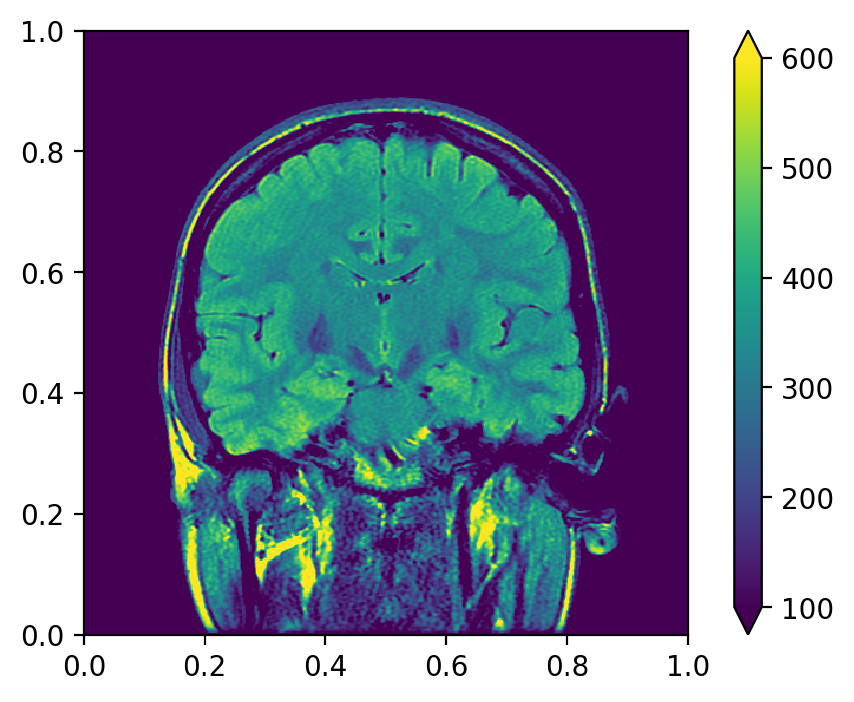

In [40]:
plt.imshow(scan[18, :, :], extent = [0.0, 1.0, 0.0, 1.0])
plt.clim(100, 600)
plt.colorbar(extend='both')

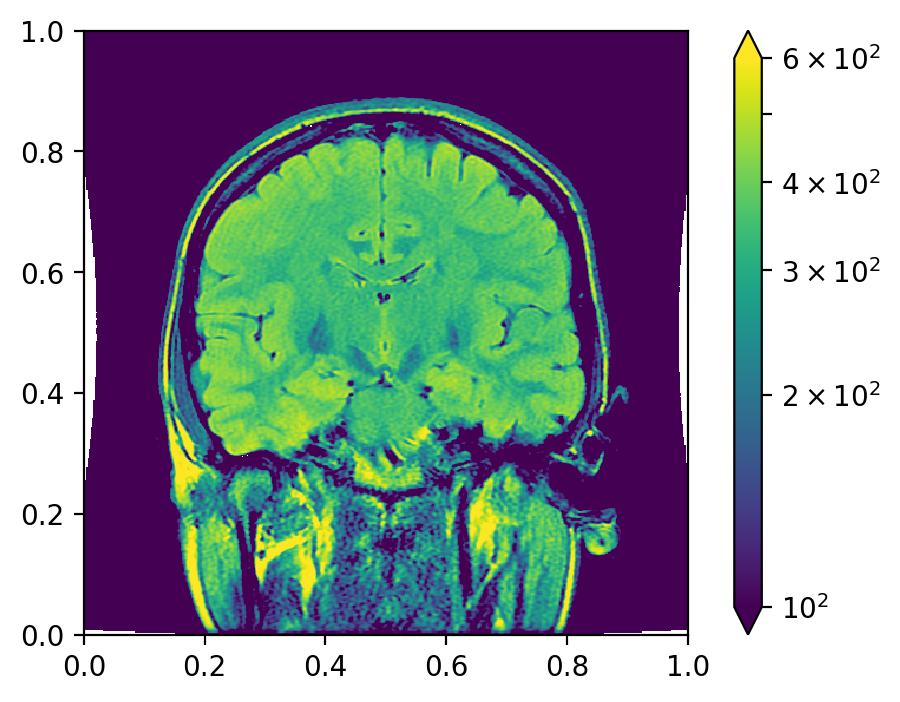

In [44]:
plt.imshow(scan[18, :, :], extent = [0.0, 1.0, 0.0, 1.0], norm = colors.LogNorm())
plt.clim(100, 600)
plt.colorbar(extend='both')

In [45]:
import ipywidgets

In [49]:
@ipywidgets.interact(colormap = plt.colormaps(), index = (0, 35, 1),
                     cmin = (0.0, 1750.0, 1.0), cmax = (0.0, 1750.0, 1.0))
def plot(colormap = 'gray', index = 18, cmin = 1.0, cmax = 600.0):
    plt.imshow(scan[index, :, :], extent = [0., 1., 0., 1.], cmap=colormap)
    plt.clim(cmin, cmax)
    plt.colorbar(extend = 'both')

interactive(children=(Dropdown(description='colormap', index=122, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), value='gray'), IntSlider(value=18, description='index', max=35), FloatSlider(value=1.0, description='cmin', max=1750.0, step=1.0), FloatSlider(value=600.0, description='cmax', max=1750.0, step=1.0), Output()), _dom_classes=('widget-interact',))

# During Lab

 * Take widget for brain scan and apply to Michigan data
 * Checkbox for whether or not to use SymLog: if yes, use `colors.SymLog` and if no, use `colors.Normalize`
 * Bonus option: setting center in x and y and width

In [62]:
@ipywidgets.interact(colormap = plt.colormaps(),
                     color_range = (1.0, 352.0, 1.0),
                     x_center = (0, michigan.shape[0], 30),
                     y_center = (0, michigan.shape[1], 30),
                     width = (100, 5000, 100)
                     )
def plot(colormap = 'terrain', color_range = 352, sym_log = True,
         x_center = 2000, y_center = 2500, width = 3000):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
    x_min = x_center - width / 2.0
    x_max = x_center + width / 2.0
    y_min = y_center - width / 2.0
    y_max = y_center + width / 2.0
    plt.imshow(michigan, cmap=colormap, norm = norm)
    plt.clim(-color_range, color_range)
    plt.xlim(x_min, x_max)
    plt.ylim(y_max, y_min)
    plt.colorbar(extend = 'both')

interactive(children=(Dropdown(description='colormap', index=162, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), value='terrain'), FloatSlider(value=352.0, description='color_range', max=352.0, min=1.0, step=1.0), Checkbox(value=True, description='sym_log'), IntSlider(value=2000, description='x_center', max=5365, step=30), IntSlider(value=2500, description='y_center', max=4201, step=30), IntSlider(value=3000, description='width', max=5000, min=100, step=100), Output()), _dom_classes=('widget-interact',))